# PyFolding SI Notebook 2
---

[Authors] ERGM

---

## Fitting Gankyrin Data to various kinetic models in series

In this notebook we will fit more complicated models to some example data. Here the idea is to show that we can fit multiple models in series to folding data. The models are slightly more complex than two-state folding (Pyfolding SI Notebook 1.) These models can be used with in bought software, but with PyFolding we can automate and is Free!

If you are less script/computer orientated, you can simply change the data paths/variables, etc for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).

In this notebook I will be using data from the paper below:

```
Mapping the Topography of a Protein Energy Landscape
Hutton, R. D., Wilkinson, J., Faccin, M., Sivertsson, E. M., Pelizzola, A., Lowe, A. R., Bruscolini, P. & Itzhaki, L. S.
J Am Chem Soc (2015) 127, 46: 14610-25
```
[http://pubs.acs.org/doi/10.1021/jacs.5b07370]



### Data Format

See PyFolding SI Notebook 1 for how to set up your .csv files for import 

### Special Considerations

1. If you wish to perform global analyses on folding data, the datasets of the same WT/mutant concerned must be in the same .csv
2. Kinetics data should be entered as rate constants ( *k* ) and NOT as the `log` of the rate constant.
3. There can be no "empty" cells in the x-axis variables in the .csv file for kinetics data.

---

Example .csv structure:

urea   |k1	      |k2
:-----: |:------: |:-------:
8.59   |	1.72  |		
8.77   |	1.96  |		
9.00   |	2.41  |		
0.54   |	5.44  |	23.6
0.79   |	5.94  |	21.2
1.02   |	6.56  |	21.6
...    | ...      | ...

---

In [1]:
# As in previous notebook, lets load pyfolding & pyplot into this ipython notebook 
#(pyplot allows us to plot more complex figures of our results):

%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

In [2]:
# loading the data - The kinetics of each protein is in one .csv as per the example .csv above
pth = "/Users/ergm/Dropbox/AlanLoweCollaboration/Datasets/GankyrinFolding"
GankyrinChevron = pyfolding.read_kinetic_data(pth,"GankyrinWTChevron.csv")

# let's give this dataset a good name
GankyrinChevron.ID = 'Gankyrin WT'

Let's plot the chevron phases:

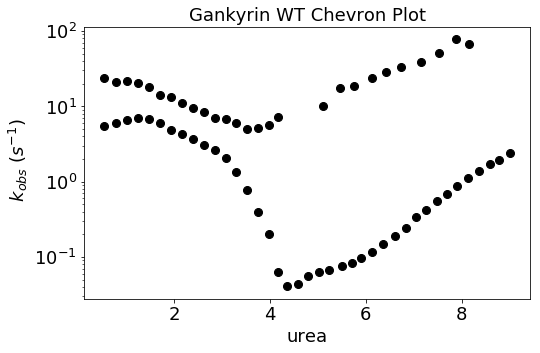

In [3]:
# easy plotting of the entire dataset ...
GankyrinChevron.plot()

Note that the measurements were performed at $25^\text{o}$C.  This is the default for pyFolding.  However lets set this just for saftey.

In [4]:
pyfolding.set_temperature(25.0)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


---

#### OK, now we can try fitting the data to a series of protein folding models automatically 

Lets first list the models that are already in PyFolding.

#### We can list the models in pyfolding:

In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

# After the model name:
#'Verified: True' signifies that we have tested the model and it functions as expected.
#'Verified:False' signifies that the model has not been rigourously tested.

[('CurvedChevronPolynomialFit', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: False'),
 ('ThreeStateEquilibrium', 'Verified: False'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: False'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: False'),
 ('TwoStateDimerEquilibrium', 'Verified: False'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

---
If you want to see more remember you can print out the model for viewing and then print out the variables of the model as per the commands given in PyFolding SI Notebook 1.

### Now lets fit to multiple models

 Fitting results 
ID: Gankyrin WT
Model: TwoStateChevron
Method: scipy.optimize.curve_fit 

kf: 42.82617 ± 6.40060
mf: 1.32179 ± 0.05066
ku: 0.00005 ± 0.00003
mu: 1.21849 ± 0.07584
--------------------------------------------------
R^2: -0.84861


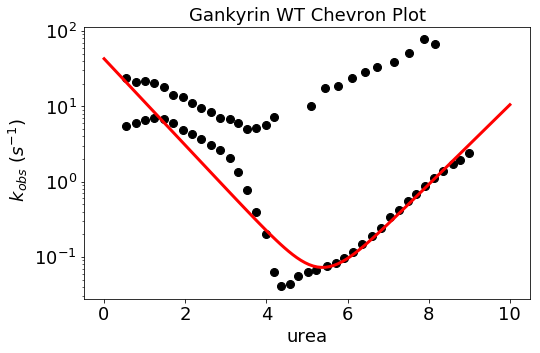

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateChevron
Method: scipy.optimize.curve_fit 

kfi: 0.00032 ± 0.00000
mif: -0.99293 ± 0.00217
kif: 3088061.04961 ± 283341.61379
mi: -5.23401 ± 0.02293
Kiu: 0.00000 ± 0.00000
mu: -1.30465 ± 0.00595
--------------------------------------------------
R^2: 0.95508


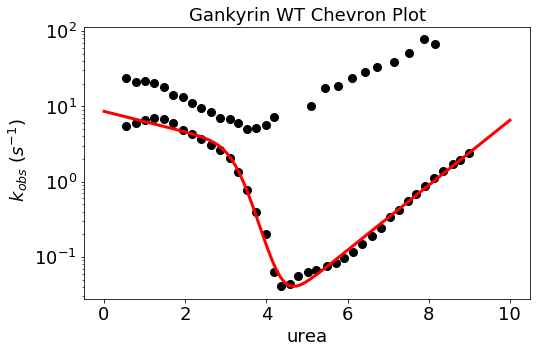

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateSequentialChevron
Method: scipy.optimize.curve_fit 

kui: 30049.62169 ± 44666.72424
mui: -1.36242 ± 2.02519
kif: 44.07373 ± 7.67163
mif: 1.36143 ± 0.01674
kfi: 0.01739 ± 0.00148
mfi: 0.31981 ± 0.02019
--------------------------------------------------
R^2: -0.36565


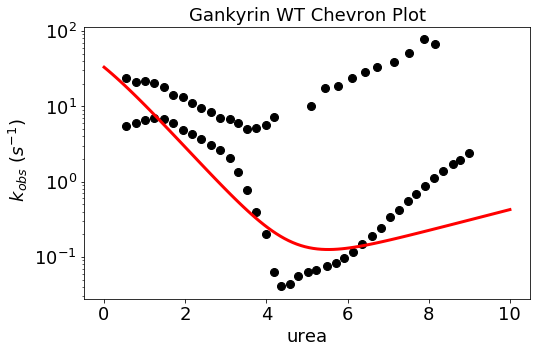

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateFastPhaseChevron
Method: scipy.optimize.curve_fit 

kui: 726.43137 ± 152471530.69431
mui: 2.50450 ± 118002.33659
kiu: 0.00101 ± 211.86978
miu: 1.42452 ± 118002.33323
kif: 6166648.24920 ± 637175.27923
mif: 4.24069 ± 0.02640
kfi: 0.00032 ± 0.00001
mfi: 0.99294 ± 0.00225
--------------------------------------------------
R^2: 0.95509


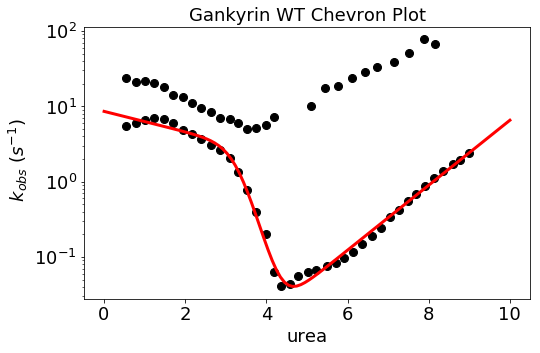

 Fitting results 
ID: Gankyrin WT
Model: TwoStateChevronMovingTransition
Method: scipy.optimize.curve_fit 

ku: 0.00000 ± 0.00000
mu: 4.98449 ± 0.08190
kf: 8.64128 ± 0.38327
mf: 0.19051 ± 0.03356
m_prime: -0.27314 ± 0.00577
--------------------------------------------------
R^2: 0.86662


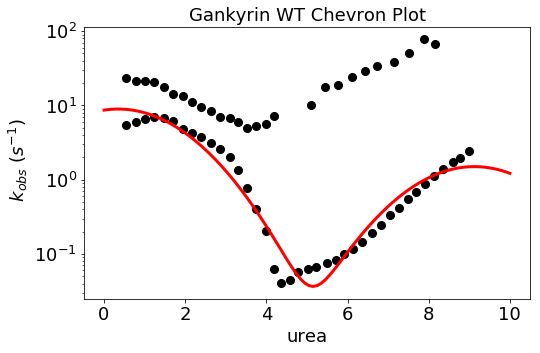

 Fitting results 
ID: Gankyrin WT
Model: CurvedChevronPolynomialFit
Method: scipy.optimize.curve_fit 

ku: 0.00062 ± 0.00007
mu: 0.76331 ± 0.03415
mu_prime: 0.01845 ± 0.00245
kf: 1.92293 ± 0.03318
mf: 1.82503 ± 0.01648
mf_prime: -0.61791 ± 0.00344
--------------------------------------------------
R^2: 0.95713


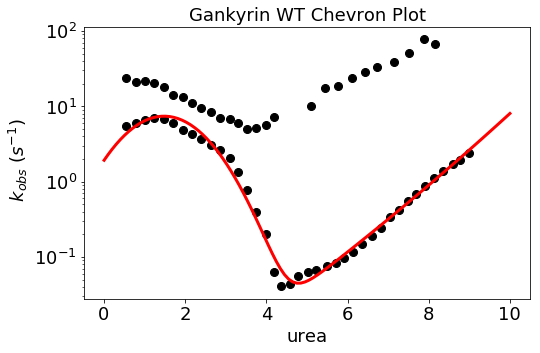

In [9]:
# make a list of models to be used to fit in the square brackets
test_models = [models.TwoStateChevron, 
               models.ThreeStateChevron, 
               models.ThreeStateSequentialChevron,
               models.ThreeStateFastPhaseChevron,
               models.TwoStateChevronMovingTransition,
               models.CurvedChevronPolynomialFit]

               #now tell Pyfolding to fit your data to each model
for model in test_models:
    GankyrinChevron.fit_func = model   # 1st select the fit function and associates it with the data ()
    GankyrinChevron.fit()              # then fit it. 
    GankyrinChevron.plot()             # then plot them, can add (components=True) to plot component rate constants

---
### We can also fit to multiple models and output the "prettier" graphics 
(as in PyFolding SI Notebook 1)

 Fitting results 
ID: GankyrinEquilmDenaturationCurve
Model: TwoStateEquilibriumSloping
Method: scipy.optimize.curve_fit 

alpha_f: -37.25158 ± 0.01927
beta_f: -0.49562 ± 0.00869
alpha_u: 26.33776 ± 0.06518
beta_u: 1.06005 ± 0.01229
m: 2.90885 ± 0.00777
d50: 4.12424 ± 0.00066
--------------------------------------------------
R^2: 0.99869


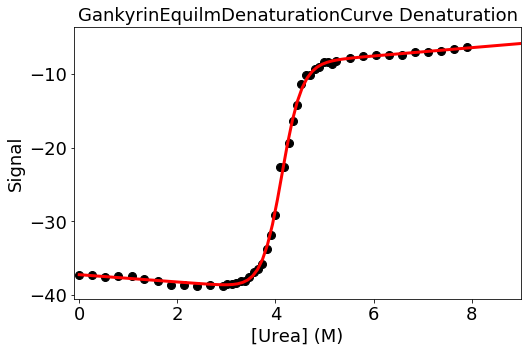

In [7]:
# First load in the Equilm denaturation (as per PyFolding SI Notebook 1)
pth = "/Users/ergm/Dropbox/AlanLoweCollaboration/Datasets/GankyrinFolding"
GankyrinEquilm = pyfolding.read_equilibrium_data(pth,"GankyrinEquilmDenaturationCurve.csv")

#1st select the fit function and associates it with the data
GankyrinEquilm.fit_func = models.TwoStateEquilibriumSloping

#then fit it. 
GankyrinEquilm.fit(p0=[-37, 0.1, -15, 0.1, 3,4]) # the brackets enable you to define starting values for the variables see notebook 1

# and plot to check all it OK
GankyrinEquilm.plot()



 Fitting results 
ID: Gankyrin WT
Model: TwoStateChevron
Method: scipy.optimize.curve_fit 

kf: 42.82617 ± 6.40060
mf: 1.32179 ± 0.05066
ku: 0.00005 ± 0.00003
mu: 1.21849 ± 0.07584
--------------------------------------------------
R^2: -0.84861


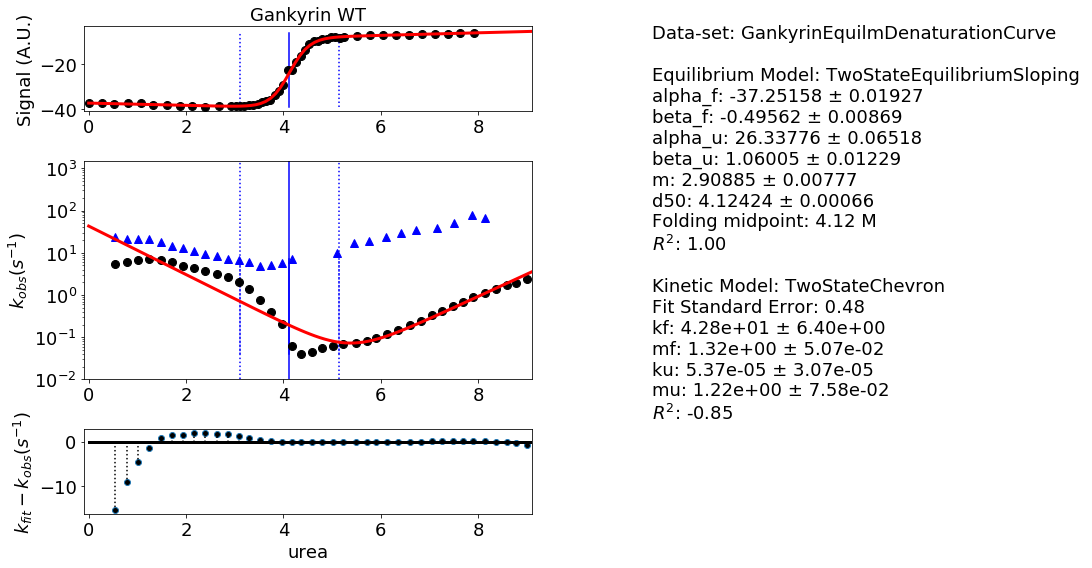

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateChevron
Method: scipy.optimize.curve_fit 

kfi: 0.00032 ± 0.00000
mif: -0.99293 ± 0.00217
kif: 3088061.04961 ± 283341.61379
mi: -5.23401 ± 0.02293
Kiu: 0.00000 ± 0.00000
mu: -1.30465 ± 0.00595
--------------------------------------------------
R^2: 0.95508


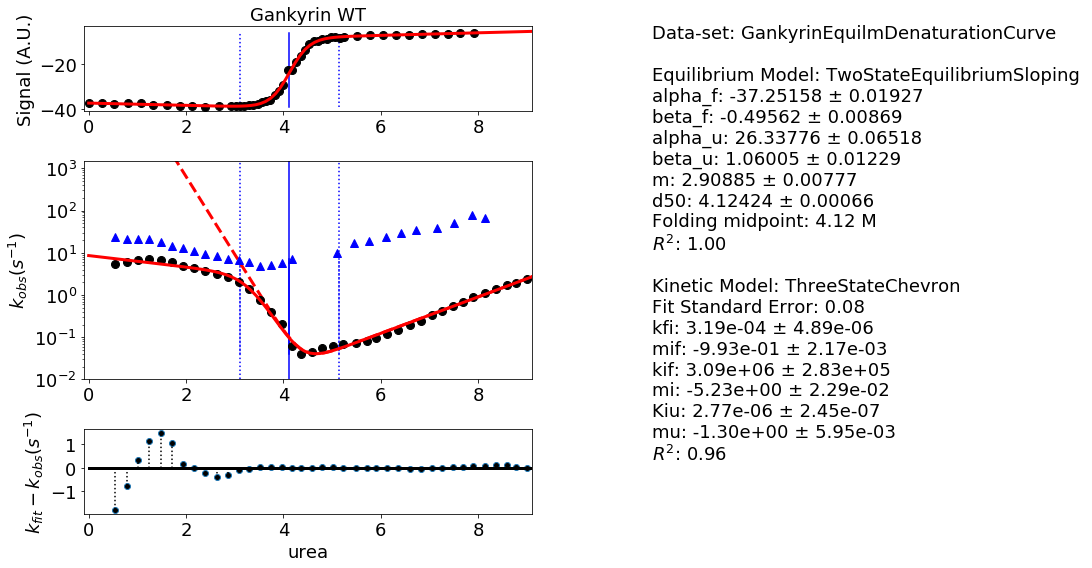

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateSequentialChevron
Method: scipy.optimize.curve_fit 

kui: 30049.62169 ± 44666.72424
mui: -1.36242 ± 2.02519
kif: 44.07373 ± 7.67163
mif: 1.36143 ± 0.01674
kfi: 0.01739 ± 0.00148
mfi: 0.31981 ± 0.02019
--------------------------------------------------
R^2: -0.36565


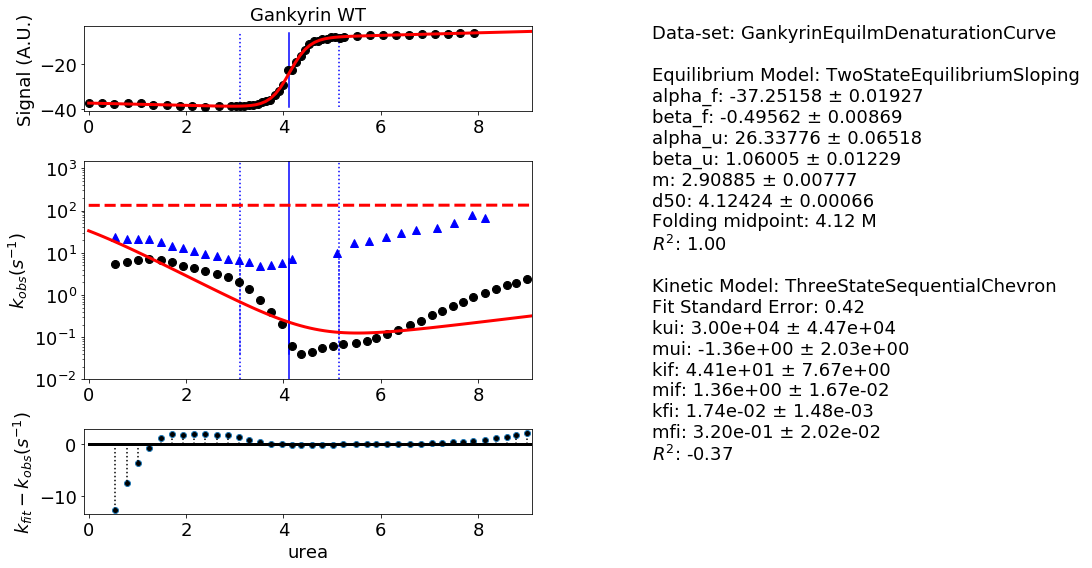

 Fitting results 
ID: Gankyrin WT
Model: ThreeStateFastPhaseChevron
Method: scipy.optimize.curve_fit 

kui: 726.43137 ± 152471530.69431
mui: 2.50450 ± 118002.33659
kiu: 0.00101 ± 211.86978
miu: 1.42452 ± 118002.33323
kif: 6166648.24920 ± 637175.27923
mif: 4.24069 ± 0.02640
kfi: 0.00032 ± 0.00001
mfi: 0.99294 ± 0.00225
--------------------------------------------------
R^2: 0.95509


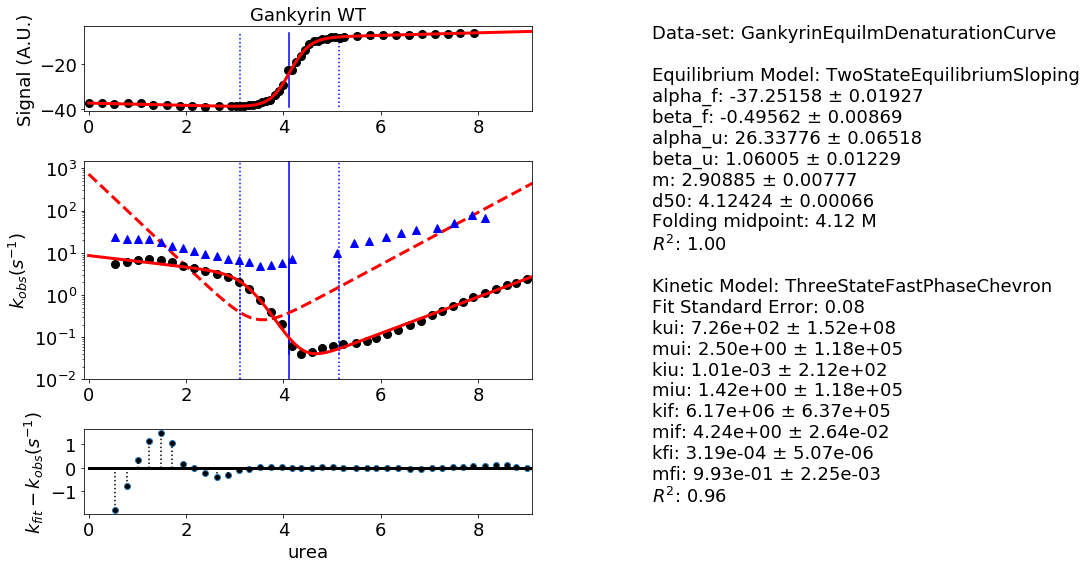

 Fitting results 
ID: Gankyrin WT
Model: TwoStateChevronMovingTransition
Method: scipy.optimize.curve_fit 

ku: 0.00000 ± 0.00000
mu: 4.98449 ± 0.08190
kf: 8.64128 ± 0.38327
mf: 0.19051 ± 0.03356
m_prime: -0.27314 ± 0.00577
--------------------------------------------------
R^2: 0.86662


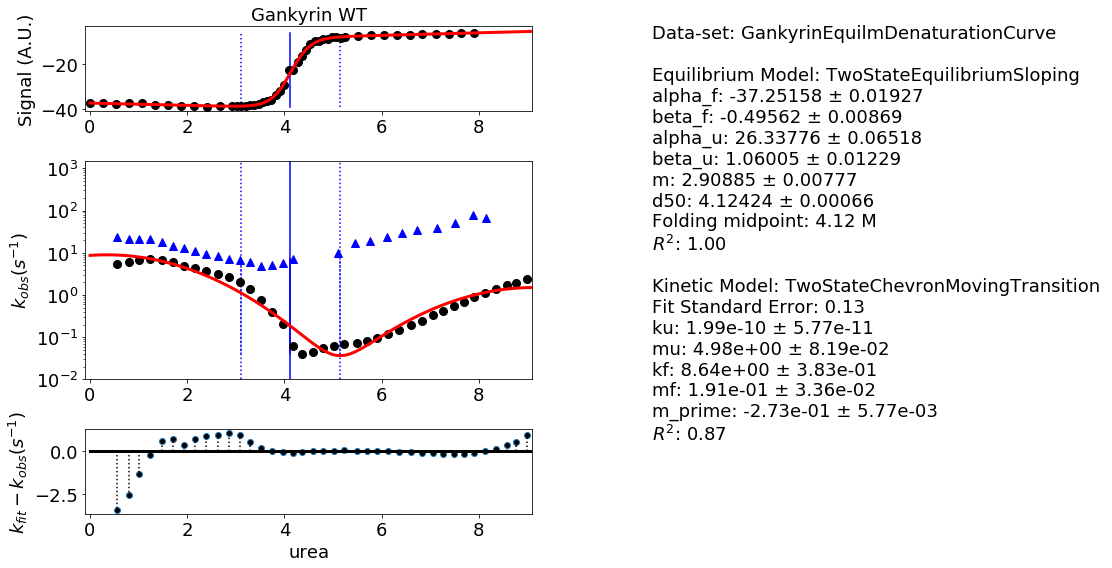

 Fitting results 
ID: Gankyrin WT
Model: CurvedChevronPolynomialFit
Method: scipy.optimize.curve_fit 

ku: 0.00062 ± 0.00007
mu: 0.76331 ± 0.03415
mu_prime: 0.01845 ± 0.00245
kf: 1.92293 ± 0.03318
mf: 1.82503 ± 0.01648
mf_prime: -0.61791 ± 0.00344
--------------------------------------------------
R^2: 0.95713


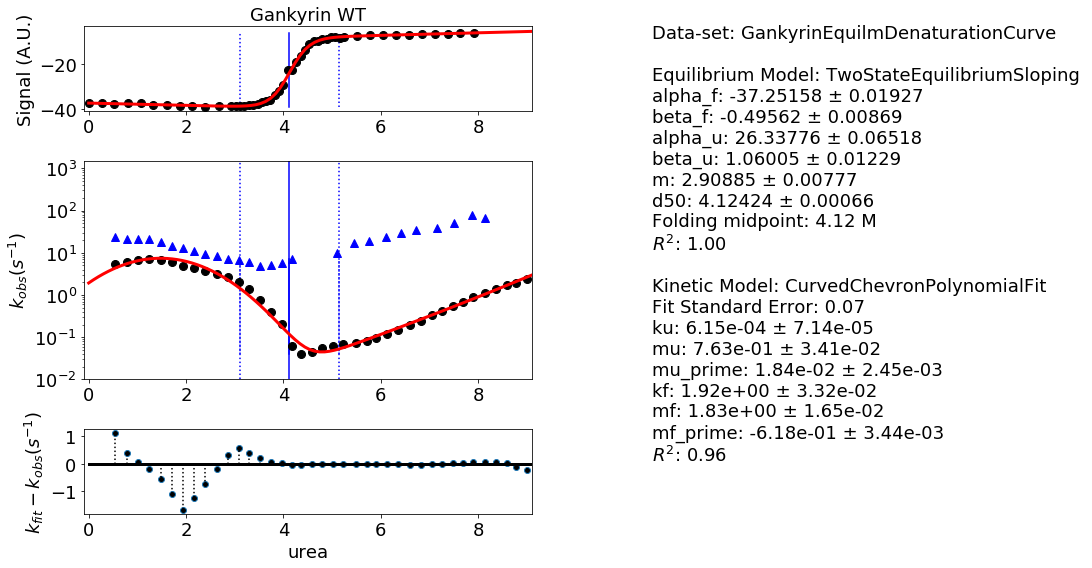

In [10]:
# again make a list of models to be used to fit in the square brackets
test_models = [models.TwoStateChevron,
               models.ThreeStateChevron, 
               models.ThreeStateSequentialChevron,  
               models.ThreeStateFastPhaseChevron,
               models.TwoStateChevronMovingTransition,
               models.CurvedChevronPolynomialFit]

#now tell Pyfolding to fit your data to each model
for model in test_models:
    GankyrinChevron.fit_func = model                                    # 1st select the fit function and associates it with the data ()
    GankyrinChevron.fit()                                               # then fit it. 
    pyfolding.plot_figure(GankyrinEquilm, GankyrinChevron, display=True) # then plot them with output parameters

---

### End of this Notebook.

---